# Exploring Foreign Languages

So far, we have been learning about general ways to explore texts through manipulating strings and regular expressions. Today, we will be focusing on what we can do when texts are in languages other than English. This will just be an introduction to some of the many different modules that can be used for these tasks. The goal is to learn some tools, including Polyglot and translation, that can be jumping off points to see what you may or may not need going forward.

### Lesson Outline:
- Q&A about what we've gone over so far
- Examples (with Sara's data)
- Practice!

## Installations
Uncomment and run the cell below!

In [1]:
#!pip install translation
#!pip install py-translate
#!pip install morfessor

## Importing Text

In [2]:
import codecs
with codecs.open('Skyggebilleder af en Reise til Harzen.txt', 'r', encoding='utf-8', errors='ignore') as f:
    read_text = f.read()
read_text

"Skyggebilleder af en Reise til Harzen, det sachsiske Schweiz etc. etc, i Sommeren 1831\rI          Ingen Fortale. Havet. Floden Trave. Lbeck.         Mariekirken. Ddningedandsen. Wandsbeck.                           Wenn jemand eine Reise thut,                  So kann er was verzhlen,  \rsiger Claudius, men om Nogen vil hre det, bliver en anden Sag.\rVi leve i en Tid, hvor store Verdensbegivenheder flge Slag i Slag paa hinanden, hvor der i eet Aar udvikler sig mere, end fr i hele Decennier; Meteor flger Meteor paa den politiske Himmel, hvorledes faaer man da Tid til, at lgge Mrke til den enkelte, opadstrbende Psyche? - Verden handler nu, den arbeider for den kommende Digter-Slgt, der skal gjre vor Nutid uddelig. Men voxer Vingen, vil ogsaa Fuglen flagre, og om der er Krig eller Fred, Bryllup eller Begravelse, synger den sin Sang, til dens Digterhjerte brister; der findes altid een eller anden beslgtet Sjl, der midt i den store Verdens travlhed vederqvges ved dens Toner, og mere kan d

In [3]:
# pulling out a subsection of text for our examples
text_snippet = read_text[20000:23000]

## Translating Text

There are many different ways that you could go about translating text within Python, but one of the easiest is the package `translation`. `translation` makes use of existing online translators. The module used to include a method for Google Translate, but the site no longer allows easy access. Bing is probably the most useful method for it.

**Pros:**
* Easy to set up
* Runs quickly

**Cons:**
* Not always accurate
* Internet connection needed
* Language limitations

The documentation (or lack there of): https://pypi.python.org/pypi/translation

In [4]:
import translation

In [5]:
translation.bing(text_snippet, dst = 'en')

'Funeral, there is poetic concerning, because it is truth.\nInside the narrow Street, hit up on a quite as snevert Chamber, lay the poor Corpse; The wife was sitting and grd over it, she knew no Udvei to conjure up the buried; The window stood open, since a small Canary fli in and sat down at the head of the corpse and proceeded to sing: it made a strange Impression on the woman, she could not, she thought, the lnger grde may vre come down from our Lord. The bird was tame, the share it should presently capture, and when she told a Naboerske it and showed her the bird, recalled this out she had seen in the newspaper an card fr Avertissement on a Canary, who was flyvet away.\nIt was this, and his wife found that menneskekjrlige Hearts, which helped her the Dde in the ground.\nThe city is the gjennemskaaren of the River; here in this Daisy recovered its, I saw some who saw me out, like true Sewers. HIE Houses on both sides, but no Street, only the narrow Canal, long enough to see the elab

Other alternatives for translating your text include:
* `py-translate`
    * Makes use of Google Translate
    * Often return errors / gets blocked
    * Can be used from the command line
    * Documentation: https://pypi.python.org/pypi/py-translate


* API calls to Google Translate
    * Takes a little more set-up
    * Can be customized a little bit more
    * Can translate a LOT of text

In [6]:
# using py-translate
from translate import translator

# calling tranlator function, telling it that the 
translator('da', 'en',text_snippet[:200])

[[['Burial has rrende poetry, as it is true.\r',
   'Begravelse, der er poetisk rrende, da den er Sandhed.\r',
   0],
  ['Inside the narrow lane, hit up on an equally Snevert chamber lay the poor corpse; ',
   'Inde i den snevre Gade, hit oppe paa et ligesaa snevert Kammer, laae det fattige Liig;',
   0],
  ['The wife was sitting and crying about it, she knew no way out for fa',
   'Konen sad og grd over det, hun vidste ingen Udvei til at fa',
   0]],
 'da']

## Polyglot

Polyglot is "a natural language pipeline that supports massive multilingual applications," in other words, it does a lot of stuff. It is a sort of one-stop-shop for many different functions that you may want to apply to you text, and supports many different languages. We are going to run through some of its functionalities.

Docs: http://polyglot.readthedocs.io/en/latest/

#### Language Detection

In [8]:
from polyglot.detect import Detector

# create a detector object that contains read_text
# and assigning it to DETECTED
detected = Detector(read_text)

# the .language method will return the language the most of
# the text is made up of and the system is confident about
print(detected.language)

name: Danish      code: da       confidence:  96.0 read bytes:   714


In [9]:
# sometimes there will be multiple languages within
# the text, and you will want to see all of them
for language in detected.languages:
  print(language)

name: Danish      code: da       confidence:  96.0 read bytes:   714
name: Norwegian   code: no       confidence:   2.0 read bytes:   529
name: German      code: de       confidence:   1.0 read bytes:   701


In [10]:
# if you try to pass in a string that is too short
# for the system to get a good read on, it will throw
# an error, alerting you to this fact
Detector("4")

UnknownLanguage: Try passing a longer snippet of text

In [11]:
# we can override that with the optional argument 'quiet=True'
print(Detector("4", quiet=True))

Prediction is reliable: False
Language 1: name: un          code: un       confidence:   0.0 read bytes:     0
Language 2: name: un          code: un       confidence:   0.0 read bytes:     0
Language 3: name: un          code: un       confidence:   0.0 read bytes:     0


In [12]:
# here are all of the languages supported for language detection
from polyglot.utils import pretty_list
print(pretty_list(Detector.supported_languages()))

  1. Abkhazian                  2. Afar                       3. Afrikaans                
  4. Akan                       5. Albanian                   6. Amharic                  
  7. Arabic                     8. Armenian                   9. Assamese                 
 10. Aymara                    11. Azerbaijani               12. Bashkir                  
 13. Basque                    14. Belarusian                15. Bengali                  
 16. Bihari                    17. Bislama                   18. Bosnian                  
 19. Breton                    20. Bulgarian                 21. Burmese                  
 22. Catalan                   23. Cebuano                   24. Cherokee                 
 25. Nyanja                    26. Corsican                  27. Croatian                 
 28. Croatian                  29. Czech                     30. Chinese                  
 31. Chinese                   32. Chinese                   33. Chinese                  

#### Tokenization

Similar to what we saw with NLTK, Polyglot can break our text up into words and sentences. Polyglot has the advantage of spanning multiple languages, and thus is more likely to identify proper breakpoint in languages other than English.

In [13]:
from polyglot.text import Text

# creating a Text object that analyzes our text_snippet
text = Text(text_snippet)

In [14]:
# Text also has a language instance variable
print(text.language)

# here, we are looking at text_snippet tokenized into words
text.words

name: Danish      code: da       confidence:  99.0 read bytes:   690


WordList(['Begravelse', ',', 'der', 'er', 'poetisk', 'rrende', ',', 'da', 'den', 'er', 'Sandhed', '.', 'Inde', 'i', 'den', 'snevre', 'Gade', ',', 'hit', 'oppe', 'paa', 'et', 'ligesaa', 'snevert', 'Kammer', ',', 'laae', 'det', 'fattige', 'Liig', ';', 'Konen', 'sad', 'og', 'grd', 'over', 'det', ',', 'hun', 'vidste', 'ingen', 'Udvei', 'til', 'at', 'faae', 'det', 'begravet', ';', 'Vinduet', 'stod', 'aabent', ',', 'da', 'fli', 'der', 'en', 'lille', 'Canariefugl', 'ind', 'og', 'satte', 'sig', 'ved', 'Hovedet', 'af', 'Liget', 'og', 'gav', 'sig', 'til', 'at', 'synge', ':', 'det', 'gjorde', 'et', 'underligt', 'Indtryk', 'paa', 'Konen', ',', 'hun', 'kunde', 'ikke', 'grde', 'lnger', ',', 'hun', 'syntes', ',', 'den', 'maatte', 'vre', 'kommet', 'ned', 'fra', 'vor', 'Herre', '.', 'Fuglen', 'var', 'tam', ',', 'den', 'lod', 'sig', 'strax', 'fange', ',', 'og', 'da', 'hun', 'nu', 'fortalte', 'en', 'Naboerske', 'det', 'og', 'viste', 'hende', 'Fuglen', ',', 'erindrede', 'denne', 'sig', ',', 'at', 'hun', '

In [15]:
# now we are looking at text_snippet broken down into sentences
text.sentences

[Sentence("Begravelse, der er poetisk rrende, da den er Sandhed."),
 Sentence("Inde i den snevre Gade, hit oppe paa et ligesaa snevert Kammer, laae det fattige Liig; Konen sad og grd over det, hun vidste ingen Udvei til at faae det begravet; Vinduet stod aabent, da fli der en lille Canariefugl ind og satte sig ved Hovedet af Liget og gav sig til at synge: det gjorde et underligt Indtryk paa Konen, hun kunde ikke grde lnger, hun syntes, den maatte vre kommet ned fra vor Herre."),
 Sentence("Fuglen var tam, den lod sig strax fange, og da hun nu fortalte en Naboerske det og viste hende Fuglen, erindrede denne sig, at hun kort fr havde seet i Avisen et Avertissement om en Canariefugl, der var flyvet bort."),
 Sentence("Det var denne, og Konen fandt der menneskekjrlige Hjerter, som hjalp hende den Dde i Jorden."),
 Sentence("Byen er gjennemskaaren af Canaler; her i dette Qvarteer, saae jeg nogle, der saae mig ud, som sande Kloaker."),
 Sentence("Hie Huse paa begge Sider, men ingen Gade, kun

#### Side Notes: Important Package Information

Not all of the packages are downloaded for all functionalities for all languages in Polyglot. Instead of forcing you to download a lot of files in the beginning, the creators decided that it would be better for language extensions to be downloaded on an 'as-necessary' basis. You will occassionaly be told that you're lacking a package, and you will need to download it. You can either do that with the built-in downloader, or from the command line.

In [16]:
# staying within python
from polyglot.downloader import downloader
downloader.download("embeddings2.en")

[polyglot_data] Downloading package embeddings2.en to
[polyglot_data]     /Users/ronaldwalker/polyglot_data...
[polyglot_data]   Package embeddings2.en is already up-to-date!


True

In [17]:
# alternate command line method
!polyglot download embeddings2.da pos2.da

[polyglot_data] Downloading package embeddings2.da to
[polyglot_data]     /Users/ronaldwalker/polyglot_data...
[polyglot_data]   Package embeddings2.da is already up-to-date!
[polyglot_data] Downloading package pos2.da to
[polyglot_data]     /Users/ronaldwalker/polyglot_data...
[polyglot_data]   Package pos2.da is already up-to-date!


Also, if you're working with a language and want to know what Polyglot lets you do with a language, it provides a `supported_tasks` method.

In [18]:
# tasks available for english
downloader.supported_tasks(lang="en")

['uniemb',
 'unipos',
 'tsne2',
 'ner2',
 'sentiment2',
 'sgns2',
 'embeddings2',
 'counts2',
 'pos2',
 'morph2']

In [19]:
# tasks available for danish
downloader.supported_tasks(lang="da")

['morph2',
 'ner2',
 'embeddings2',
 'uniemb',
 'unipos',
 'pos2',
 'transliteration2',
 'sentiment2',
 'sgns2',
 'tsne2',
 'counts2']

#### Part of Speech Tagging

Polyglot supports POS tagging for several languages.

In [20]:
# languages that polyglot supports for part of speech tagging
print(downloader.supported_languages_table("pos2"))

  1. Irish                      2. Swedish                    3. Slovene                  
  4. French                     5. Indonesian                 6. Finnish                  
  7. English                    8. Portuguese                 9. Dutch                    
 10. Bulgarian                 11. German                    12. Danish                   
 13. Czech                     14. Hungarian                 15. Italian                  
 16. Spanish; Castilian       


In [21]:
text.pos_tags

[('Begravelse', 'NOUN'),
 (',', 'PUNCT'),
 ('der', 'PART'),
 ('er', 'VERB'),
 ('poetisk', 'ADJ'),
 ('rrende', 'NOUN'),
 (',', 'PUNCT'),
 ('da', 'SCONJ'),
 ('den', 'PRON'),
 ('er', 'VERB'),
 ('Sandhed', 'NOUN'),
 ('.', 'PUNCT'),
 ('Inde', 'NOUN'),
 ('i', 'ADP'),
 ('den', 'PRON'),
 ('snevre', 'ADJ'),
 ('Gade', 'NOUN'),
 (',', 'PUNCT'),
 ('hit', 'NOUN'),
 ('oppe', 'ADV'),
 ('paa', 'ADP'),
 ('et', 'PRON'),
 ('ligesaa', 'ADJ'),
 ('snevert', 'ADJ'),
 ('Kammer', 'NOUN'),
 (',', 'PUNCT'),
 ('laae', 'ADJ'),
 ('det', 'PRON'),
 ('fattige', 'ADJ'),
 ('Liig', 'ADJ'),
 (';', 'PUNCT'),
 ('Konen', 'PROPN'),
 ('sad', 'VERB'),
 ('og', 'CONJ'),
 ('grd', 'ADV'),
 ('over', 'ADP'),
 ('det', 'PRON'),
 (',', 'PUNCT'),
 ('hun', 'PRON'),
 ('vidste', 'VERB'),
 ('ingen', 'PRON'),
 ('Udvei', 'ADJ'),
 ('til', 'ADP'),
 ('at', 'PART'),
 ('faae', 'VERB'),
 ('det', 'PRON'),
 ('begravet', 'VERB'),
 (';', 'PUNCT'),
 ('Vinduet', 'NOUN'),
 ('stod', 'VERB'),
 ('aabent', 'ADV'),
 (',', 'PUNCT'),
 ('da', 'SCONJ'),
 ('fli', 'A

#### Named Entity Recognition

Polyglot can tag names and groups them into three main categories:
* Locations (Tag: I-LOC): cities, countries, regions, continents, neighborhoods, administrative divisions ...
* Organizations (Tag: I-ORG): sports teams, newspapers, banks, universities, schools, non-profits, companies, ...
* Persons (Tag: I-PER): politicians, scientists, artists, atheletes ...

In [22]:
# languages that polyglot supports for part of speech tagging
print(downloader.supported_languages_table("ner2", 3))

  1. Hebrew (modern)            2. Finnish                    3. Polish                   
  4. Dutch                      5. Portuguese                 6. Tagalog                  
  7. Thai                       8. Serbian                    9. Ukrainian                
 10. Persian                   11. Turkish                   12. Bulgarian                
 13. Catalan; Valencian        14. Estonian                  15. Hindi                    
 16. Romanian, Moldavian, ...  17. Latvian                   18. Chinese                  
 19. Slovene                   20. Czech                     21. German                   
 22. Spanish; Castilian        23. English                   24. Slovak                   
 25. Hungarian                 26. Lithuanian                27. Korean                   
 28. Danish                    29. Italian                   30. Japanese                 
 31. Indonesian                32. French                    33. Vietnamese               

In [23]:
#!polyglot download ner2.da
text.entities

[I-PER(['Konen']),
 I-PER(['Konen']),
 I-PER(['Gade']),
 I-PER(['Peer']),
 I-LOC(['Hamborg']),
 I-LOC(['Ithaca']),
 I-PER(['Max']),
 I-PER(['Casper']),
 I-PER(['effectfuld']),
 I-PER(['Agathe'])]

#### Other Features of Polyglot
* Nearest Neighbors -- http://polyglot.readthedocs.io/en/latest/Embeddings.html
* Morpheme Generation -- http://polyglot.readthedocs.io/en/latest/MorphologicalAnalysis.html
* Sentiment Analysis -- http://polyglot.readthedocs.io/en/latest/Sentiment.html
* Transliteration -- http://polyglot.readthedocs.io/en/latest/Transliteration.html

## Code Summary:

#### Translation:
* `translation.bing(your_string, dst = 'en')`

#### Polyglot:
* `<Detector>.language`
* `<Detector>.languages`
* `<Text>.language`
* `<Text>.words`
* `<Text>.sentences`
* `<Text>.pos_tags`
* `<Text>.entities`

### Extra

In [24]:
# importing some more packages
from datascience import *
%matplotlib inline
import seaborn as sns

In [25]:
# analyzing our text with a Polyglot Text object
whole_text = Text(read_text)

In [26]:
# the language of our text
print(whole_text.language)

name: Danish      code: da       confidence:  96.0 read bytes:   714


In [27]:
# getting the part of speech tags for our corpus
print(whole_text.pos_tags)
words_and_poss = list(whole_text.pos_tags)

[('Skyggebilleder', 'NOUN'), ('af', 'ADP'), ('en', 'PRON'), ('Reise', 'NOUN'), ('til', 'ADP'), ('Harzen', 'PROPN'), (',', 'PUNCT'), ('det', 'PRON'), ('sachsiske', 'VERB'), ('Schweiz', 'PROPN'), ('etc', 'PROPN'), ('.', 'PUNCT'), ('etc', 'PROPN'), (',', 'PUNCT'), ('i', 'ADP'), ('Sommeren', 'NOUN'), ('1831', 'NUM'), ('I', 'ADP'), ('Ingen', 'ADJ'), ('Fortale', 'NOUN'), ('.', 'PUNCT'), ('Havet', 'NOUN'), ('.', 'PUNCT'), ('Floden', 'PROPN'), ('Trave', 'PROPN'), ('.', 'PUNCT'), ('Lbeck', 'NUM'), ('.', 'PUNCT'), ('Mariekirken', 'NOUN'), ('.', 'PUNCT'), ('Ddningedandsen', 'NUM'), ('.', 'PUNCT'), ('Wandsbeck', 'NUM'), ('.', 'PUNCT'), ('Wenn', 'PROPN'), ('jemand', 'PUNCT'), ('eine', 'PROPN'), ('Reise', 'PROPN'), ('thut', 'PROPN'), (',', 'PUNCT'), ('So', 'PROPN'), ('kann', 'PROPN'), ('er', 'VERB'), ('was', 'PROPN'), ('verzhlen', 'ADJ'), (',', 'PUNCT'), ('siger', 'VERB'), ('Claudius', 'PROPN'), (',', 'PUNCT'), ('men', 'CONJ'), ('om', 'SCONJ'), ('Nogen', 'NOUN'), ('vil', 'VERB'), ('hre', 'ADV'), ('d

In [28]:
# putting those word / part of speech pairs into a table
wrd = Table(['Word', 'Part of Speech']).with_rows(words_and_poss)
# grouping those by part of speech to get the most commonly occuring parts of speech
df = wrd.group('Part of Speech').sort('count', descending=True).to_df()
df

,Part of Speech,count
0,PUNCT,8146
1,PRON,7717
2,ADJ,7181
3,NOUN,6264
4,ADV,5882
5,VERB,5092
6,ADP,4520
7,PROPN,2419
8,CONJ,1949
9,PART,1456


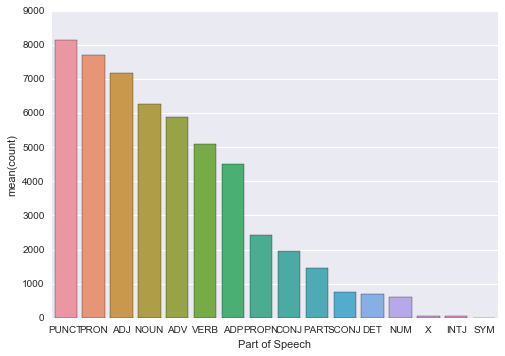

In [29]:
# plotting the counts for each part of speech using seaborn
sns.barplot(x='Part of Speech', y='count', data=df)

In [30]:
# getting the most popular word for each part of speech type
wrd_counts = wrd.group('Word').join('Word', wrd).sort('count', descending=True)
wrd_counts.group(2, lambda x: x.item(0)).show(16)

Part of Speech,Word,count
ADJ,store,163
ADP,i,1049
ADV,ikke,304
CONJ,og,1515
DET,sin,136
INTJ,ja,43
NOUN,seer,54
NUM,to,56
PART,der,689
PRON,det,862


In [31]:
# thats not very informative, so lets pull out the stop words
# using a list from http://snowball.tartarus.org/algorithms/danish/stop.txt
danish_stop_words = """og,
i,
jeg,
det,
at,
en,
den,
til,
er,
som,
på,
de,
med,
han,
af,
for,
ikke,
der,
var,
mig,
sig,
men,
et,
har,
om,
vi,
min,
havde,
ham,
hun,
nu,
over,
da,
fra,
du,
ud,
sin,
dem,
os,
op,
man,
hans,
hvor,
eller,
hvad,
skal,
selv,
her,
alle,
vil,
blev,
kunne,
ind,
når,
være,
dog,
noget,
ville,
jo,
deres,
efter,
ned,
skulle,
denne,
end,
dette,
mit,
også,
under,
have,
dig,
anden,
hende,
mine,
alt,
meget,
sit,
sine,
vor,
mod,
disse,
hvis,
din,
nogle,
hos,
blive,
mange,
ad,
bliver,
hendes,
været,
thi,
jer,
sådan"""
splt = danish_stop_words.split(',\n')
print(splt)

['og', 'i', 'jeg', 'det', 'at', 'en', 'den', 'til', 'er', 'som', 'på', 'de', 'med', 'han', 'af', 'for', 'ikke', 'der', 'var', 'mig', 'sig', 'men', 'et', 'har', 'om', 'vi', 'min', 'havde', 'ham', 'hun', 'nu', 'over', 'da', 'fra', 'du', 'ud', 'sin', 'dem', 'os', 'op', 'man', 'hans', 'hvor', 'eller', 'hvad', 'skal', 'selv', 'her', 'alle', 'vil', 'blev', 'kunne', 'ind', 'når', 'være', 'dog', 'noget', 'ville', 'jo', 'deres', 'efter', 'ned', 'skulle', 'denne', 'end', 'dette', 'mit', 'også', 'under', 'have', 'dig', 'anden', 'hende', 'mine', 'alt', 'meget', 'sit', 'sine', 'vor', 'mod', 'disse', 'hvis', 'din', 'nogle', 'hos', 'blive', 'mange', 'ad', 'bliver', 'hendes', 'været', 'thi', 'jer', 'sådan']


In [32]:
# determining which rows we need to change
not_in_stop_words = [x not in danish_stop_words for x in wrd_counts['Word']]
# most common words for each part of speech no longer including the stop words
wrd_counts.where(not_in_stop_words).group(2, lambda x: x.item(0)).show(16)

Part of Speech,Word,count
ADJ,store,163
ADP,paa,566
ADV,saae,188
CONJ,Men,40
DET,vort,19
INTJ,ja,43
NOUN,seer,54
NUM,to,56
PART,Der,40
PRON,saa,298


In [33]:
# retrieving all of the named entities that Polyglot detected
ner = str(whole_text.entities).split('I-')[1:]
ner[:5]

["LOC(['Harzen']), ",
 "LOC(['sachsiske', 'Schweiz']), ",
 "LOC(['Trave']), ",
 "LOC(['Mariekirken']), ",
 "LOC(['Ddningedandsen']), "]

In [34]:
# splitting up the type and the name
split_type = [x.split('([') for x in ner]
split_type[:5]

[['LOC', "'Harzen']), "],
 ['LOC', "'sachsiske', 'Schweiz']), "],
 ['LOC', "'Trave']), "],
 ['LOC', "'Mariekirken']), "],
 ['LOC', "'Ddningedandsen']), "]]

In [35]:
# making a table out of that
entities = Table(['Type', 'Name']).with_rows(split_type)
entities

Type,Name
LOC,"'Harzen']),"
LOC,"'sachsiske', 'Schweiz']),"
LOC,"'Trave']),"
LOC,"'Mariekirken']),"
LOC,"'Ddningedandsen']),"
PER,"'Wandsbeck']),"
PER,"'Wenn']),"
PER,"'Claudius']),"
ORG,"'Meteor']),"
PER,"'Psyche']),"


In [36]:
# how many of each type of entity there are
entities.group('Type')

Type,count
LOC,370
ORG,137
PER,708


In [37]:
# finding the most commonly occuring entities
entities.group('Name').sort('count', descending=True)

Name,count
"'Dresden']),",30
"'Berlin']),",22
"'Hamborg']),",21
"'tt']),",16
"'Goslar']),",14
"'Fugl']),",13
"'Steen']),",12
"'Digteren']),",11
"'Tieck']),",10
"'Tage']),",10


In [38]:
# possibly the most common names of people
entities.where('Type', 'PER').group('Name').sort('count', True)

Name,count
"'Fugl']),",13
"'Steen']),",12
"'Digteren']),",11
"'Tieck']),",10
"'Tage']),",10
"'Saaledes']),",10
"'Sand']),",8
"'Fanden']),",8
"'Hr']),",7
"'Dahl']),",6


In [47]:
from anderson import translate
test = translate(['translate', 'language'])
test.create(text_snippet[:350])

In [45]:
test.funcs

{'language': <bound method translate.polyglot_languages of <anderson.translate object at 0x11f2b7ef0>>,
 'original text': <bound method translate.original_text_pls of <anderson.translate object at 0x11f2b7ef0>>,
 'parts of speech': <bound method translate.polyglot_pos of <anderson.translate object at 0x11f2b7ef0>>,
 'translate': <bound method translate.tranlate_pls of <anderson.translate object at 0x11f2b7ef0>>}